<a href="https://colab.research.google.com/github/Erofili-K/BI-BA/blob/main/BI_Ask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1η εργασία Επιχειρησιακής Έρευνας & Ευφυΐας

Όνομα: Ερωφίλη Κώνστα

ΑΕΜ: 3618
<br>
<br>

**Άσκηση 1:**
<br>
Πρώτα, κατεβάζω τα δεδομένα (dataset) και τα φορτώνω σε σε ένα Pandas DataFrame. Στην συνέχεια χρησιμοποιώ την describe() για να δω κάποιες μετρικές και το πώς είναι κατανεμημένα τα δεδομένα μέσα στο dataset.
<br>
Η μεταβλητή "ds" περιέχει το dataset της εργασίας.

In [105]:
import pandas as pd 
import numpy as np

#dataset
!gdown --id 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

ds = pd.read_csv("/content/GroceriesInitial.csv", delimiter=',', header='infer')
dataf=ds
print(f"This dataset has {ds.shape} rows and collumns")
ds.head(n=10)


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 9.60MB/s]
This dataset has (7536, 35) rows and collumns


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2.7,61,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2.2,67,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,3.5,47,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,1.2,7,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,7.9,17,tropical fruit,other vegetables,white bread,bottled water,chocolate,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
ds.describe()


,id,basket_value,recency_days
count,7536.000000,7536.000000,7536.000000
mean,4920.079485,5.036584,37.814225
std,2845.875602,3.692088,25.113222
min,1.000000,1.100000,1.000000
25%,2419.500000,2.200000,12.000000
50%,4927.000000,4.100000,37.000000
75%,7375.250000,7.000000,63.000000
max,9835.000000,25.100000,76.000000


Το πρώτο πράγμα πριν αρχίσω την επεξεργασία των δεδομένων και προχωρήσω στις ασκήσεις είναι να κάνω οπτικοποίηση των δεδομένων.
<br>
Για αυτό χρησιμοποιώ τις βιβλιοθήκες matplotlib.pyplot & seaborn 
<br>
1. Μια οπτικοποίηση που μπορουμε να κάνουμε είναι ένα ιστόγραμμα που να δείχνει **το πλήθος των συναλλαγών ανά ημέρα**. Για αυτό, πρώτα μετατρέπουμε την στήλη recency_days ,που περιέχει έναν int αριθμό, σε format ημερομηνίας και ώρας.
Επειδή, δεν έχουμε την αρχική ηερομηνία η συνάρτηση pd.to_datetime() χρησιμοποιεί μια αυθαίρετηημερομηνία. Αυτό δεν παίζει ρόλο στην οπτικοποίηση των δεδομένων, γιατί η στήλη recency_days αντιπροσωπεύει το πλήθος ημερών που πέρασαν από τη μέρα της συναλλαγής. Οπότε για παράδειγμα αν σε δυο συναλλαγές το recency_day είναι 5 τότε και οι δυο αυτές συναλλαγές πραγματοποιήθηκαν την ίδια μέρα, άρα στο ιστόγραμμα θα βρίσκονται στην ίδια "ράβδο".
<br> 
Τέλος, μπορούμε να υπλογίσουμε με τον ίδιο τρόπο τον μέσο όρο των συναλλαγών κάθε μέρα.  

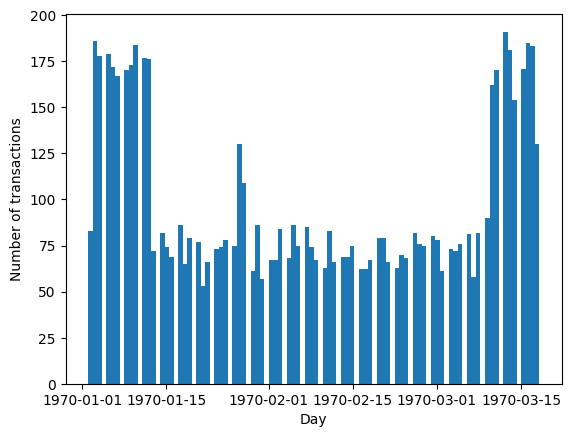

Mean number of transactions each day: 4.92502639859593 or rounded up: 5


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# recency_days -> datetime format
ds['recency_days'] = pd.to_datetime(ds['recency_days'], unit='d')
# ιστογραμμα για ρον αριθμο των συναλλαγων καθε μερα
plt.hist(ds['recency_days'], bins=100)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.show()
# μο συναλλαγες ανά ημέρα
daily_transactions = ds.groupby(ds['recency_days'].dt.date)['basket_value'].mean()
print(f"Mean number of transactions each day: {daily_transactions.mean()} or rounded up: {math.ceil(daily_transactions.mean())}")

2. Μια δεύτερη αρχική οπτικοποίηση των δεδομένων που μπορεί να γίνει με το dataset είναι να δημιουργήσουμε ένα ιστογραμμα που δείχνει πόσα προϊόντα αγοράζονται συνήθως ανά συναλλαγή. Αρχικά μετράμε πόσες στήλες απο την item_1 - item_32 έχουν τιμή και δεν είναι κενές και φτιάχνουμε το ιστόγραμμα. 
<br>
Παρατηρούμε ότι, οι περισσότεροι καταναλωτές αγοράζουν συνήθως από 1-6 προιόντα.

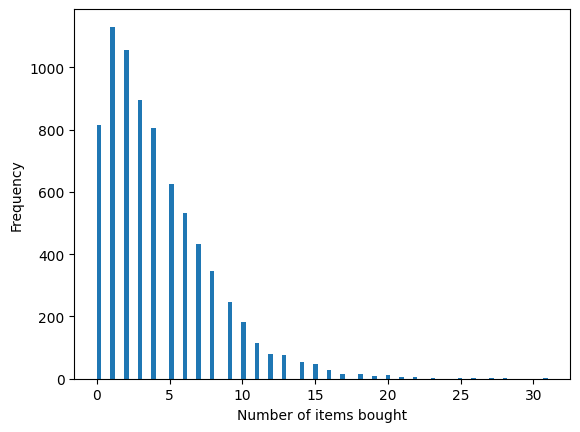

In [94]:
# πληθος προιοντων ανα συνναλλαγη
c=[]
for i, row in ds.iterrows():
    count = row.iloc[4:].count()
    #print(f"id: {row['id']} {count} items bought")
    c.append(count)

plt.hist(c, bins=100)
plt.xlabel("Number of items bought")
plt.ylabel("Frequency")
plt.show()

Στην συνέχεια πρέπει να κάνουμε μετασχηματισμό των εδομένων σε δυαδική μορφή συναλλαγών.
<br> 
Πρώτα, δημιουργούμε μια λίστα lst  που περιέχει όλα τα ονόματα των προιόντων που αγοράζουν οι καταναλωτές, χωρίς τις nan τιμές και χωρίς διπλότυπα, από τις τιμές που βρίσκονται στις στήλες item_1-item32. Στην συνέχεια ταξινομούμε την λίστα ώστε να έχει αλφαβητική σειρά και τέλος μπορούμε να εμφάνισουμε τον αριθμό των στοιχείων που περιέχει για να ελέγξουμε ότι όλα τα προιόντα έχουν περασθεί στην λίστα.
<br> 

In [95]:
import numpy as np
#κραταμε μονο τις τιμες απο την 3η στηλη κ μετα
lst = ds.iloc[:, 3:].values.flatten().tolist()
#print(lst)
#σβηνουμε τα nan
lst = [x for x in lst if not pd.isna(x)]
#μοναδικα στοιχια(οχι διπλοτυπα)
lst = list(set(lst))
print(lst)
#print(len(lst))
#sort A->z
lst.sort()
print(lst)
print(len(lst))

['chocolate', 'pasta', 'liqueur', 'frozen dessert', 'yogurt', 'red/blush wine', 'specialty chocolate', 'oil', 'sauces', 'rice', 'root vegetables', 'cream', 'shopping bags', 'honey', 'whipped/sour cream', 'chocolate marshmallow', 'tropical fruit', 'long life bakery product', 'pudding powder', 'female sanitary products', 'napkins', 'whisky', 'margarine', 'detergent', 'kitchen towels', 'flour', 'semi-finished bread', 'ketchup', 'cream cheese ', 'dog food', 'skin care', 'curd cheese', 'specialty fat', 'meat spreads', 'sliced cheese', 'frozen meals', 'frozen fish', 'pet care', 'chicken', 'pot plants', 'curd', 'light bulbs', 'cookware', 'canned beer', 'vinegar', 'citrus fruit', 'potato products', 'fruit/vegetable juice', 'cake bar', 'house keeping products', 'mayonnaise', 'cling film/bags', 'packaged fruit/vegetables', 'canned vegetables', 'condensed milk', 'waffles', 'ham', 'liver loaf', 'ice cream', 'organic products', 'frozen chicken', 'seasonal products', 'meat', 'bottled water', 'photo/

Μετά, δημιουργούμε τον δυαδικό πίνακα σε dataframe όπου κάθε στήλη αποτελεί ένα προιόν και κάθε γραμμή μια συναλλαγή. Σε κάθε κελί τοποθετείται 0 αν το προιόν δεν έχει αγορασθεί και 1 αν έχει αγορασθεί.
Τέλος, κρατάμε μόνο τα προιόντα που μας ενιδαφέρουν τα οποία είναι: citrus fruit, tropical fruit, whole milk, other vegetables, rolls/buns, chocolate, bottled water, yogurt,
sausage, root vegetables, pastry, sodα, cream. Για κάθε συναλλαγή, βρίσκουμε τα προϊόντα που αγοράστηκαν και για όσα δεν έχουν αγορασθεί βάζουμε 0.


In [96]:
# κενο dataframe με τον αριθμό των γραμμών του αρχικού dataframe και τον αριθμό των στηλών της λίστας(=169)
new_df = pd.DataFrame(0, index=ds.index, columns=lst)
# Ορισμός των ονομάτων των στηλών του νέου dataframe ως τα ονόματα των προϊόντων στη λίστα
new_df.columns = lst
products = list(set(lst))
products.sort()
# create binary matrix
new_df = pd.DataFrame(columns=products)
for i, transaction in enumerate(ds.values):
    row = [0] * len(products)
    for product in products:
        if product in transaction:
            row[products.index(product)] = 1
    new_df.loc[i] = row
#print(new_df.head())
selected_p = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream']
# Δημιουργία νέου dataframe
new_df = pd.DataFrame(columns=lst)
# Για κάθε συναλλαγή, βρίσκουμε τα προϊόντα που αγοράστηκαν
for i in range(len(ds)):
    products = ds.iloc[i, 3:].tolist()
    products = [p for p in products if p in selected_p]
    for product in products:
        new_df.at[i, product] = 1
# Αντικατάσταση των NaN με 0
new_df = new_df.fillna(0)
old_df = new_df
new_df = new_df[selected_p]
new_df.head(n=20)


,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,1,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,1,1,0,0,0,0,0,0


Στο παρακάτω ιστόγραμμα μπορούμε να δούμε την κατανομή των προιόντων που μας ενδιαφέρουν.

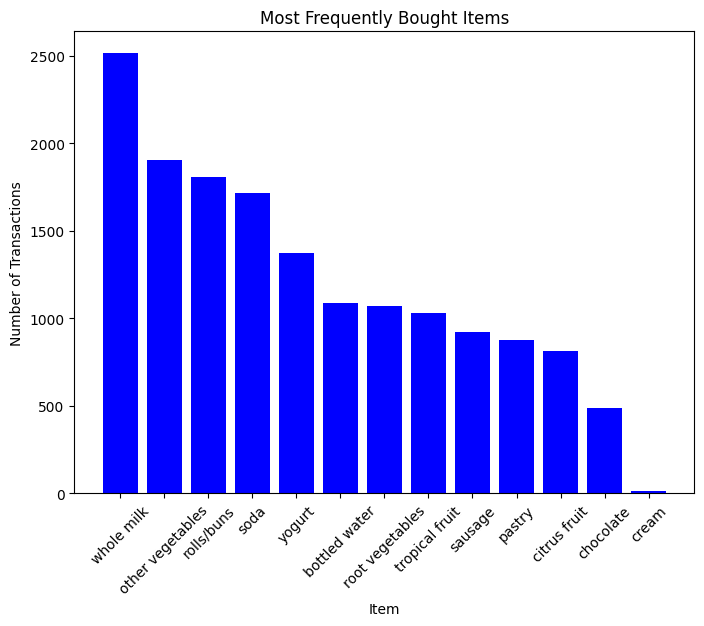

In [97]:
# Υπολογίζουμε τον αριθμό των αγορών που περιλαμβάνουν το κάθε προϊόν
counts = new_df.sum().sort_values(ascending=False)[:169]

# Δημιουργούμε το διάγραμμα αναλογιών
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts.values, color='blue')
ax.set_title('Most Frequently Bought Items')
ax.set_xlabel('Item')
ax.set_ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

Τέλος, κάνουμε την διακριτοποίηση των τιμών της στήλης basket_value και οπτικοποιούμε τα αποτελέσματα σε δυο μορφές: ιστόγραμμα και πίτα.
Αρχικά, εμφανίζουμε πόσες τιμές περιέχει κάιε στήλη για να ελέγξουμε ότι ειναι περίπου ισοπληθείς. Μετά δημιουργούμε πρώτα ένα bar chart και στην συνέχεια ένα pie chart για την οπτικοποίηση.

low_value_basket       2572
high_value_basket      2505
medium_value_basket    2459
Name: basket_category, dtype: int64


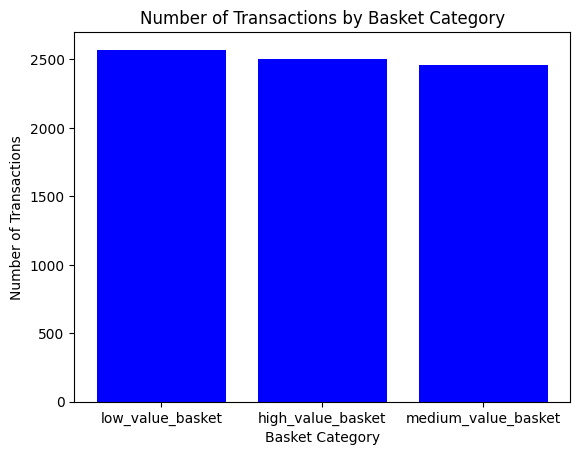

In [98]:
# Διακριτοποίηση της στήλης "basket_value" σε τρεις ισοπληθείς κατηγορίες
basket_value_bins = pd.qcut(ds['basket_value'], q=3, labels=['low_value_basket', 'medium_value_basket', 'high_value_basket'])
ds['basket_category'] = basket_value_bins

# Υπολογίζουμε τον αριθμό των αγορών που ανήκουν σε κάθε κατηγορία
counts = ds['basket_category'].value_counts()
print(counts)
# Δημιουργούμε το ιστόγραμμα
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, color='blue')
ax.set_title('Number of Transactions by Basket Category')
ax.set_xlabel('Basket Category')
ax.set_ylabel('Number of Transactions')
plt.show()

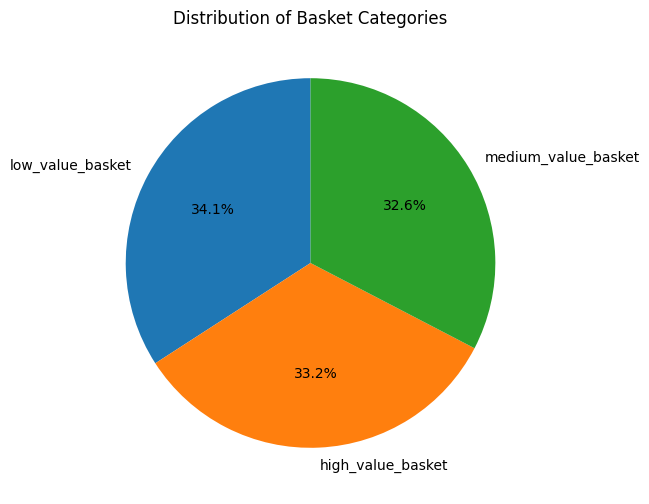

In [99]:
# Οπτικοποίηση ως pie chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Basket Categories')
plt.show()

**Άσκηση 2**
<br>
Μάθηση κανόνων συσχέτισης με την μέθοδο Apriori:
<br>
i.  Δοκιμάστε την εκτέλεση της μεθόδου Αpriori με διάφορες παραμέτρους για το ελάχιστο
Support
<br>
Πρώτα κάνουμε install το package apyori της python και τις βιβλιοθήκες που θα μας χρειαστούν. Στην συνέχεια φτιάχνουμε μια λίστα που περιέχει τον δυαδικό πίνακα που δημιουργησαμε στοην προηγουμενη ασκηση για να περασθεί ως όρισμα στην συνάρτηση apriori για να βγάλουμε τουςκανόνες.



In [100]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
from pandas.core.internals.managers import new_block
from apyori import apriori

#σειρες και στηλες
print(new_df.shape)
r=new_df.shape[0]
c=new_df.shape[1]

# Intializing the list
transacts = []
#  a list of transactions
for i in range(0, r): 
  transacts.append([str(new_df.values[i,j]) for j in range(0, c)])
#print(transacts)
# Convert data to list format and run Apriori algorithm
transactions = list(transacts)
print(transactions)
rules = apriori(transactions, min_support=0.03, min_confidence=0.02)
list(rules)




(7227, 13)
[['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0'], ['0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0'], ['1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0'], ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '1', '0', '0', '0', '0', '0', '0',

[RelationRecord(items=frozenset({'0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'1'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'1', '0'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1', '0'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'0'}), items_add=frozenset({'1'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'0'}), confidence=1.0, lift=1.0)])]

In [102]:

# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
output = inspect(rules)
output_DataFrame = pd.DataFrame(output, columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
#output_DataFrame.head(n=20)
print(output_DataFrame)



Empty DataFrame
Columns: [Left_Hand_Side, Right_Hand_Side, Support, Confidence, Lift]
Index: []


# **Ασκηση 3**
Αρχικά, δημιουργουμε ενα dataframe που περιέχει τις 2 πρωτες στήλες που μας ενδιαφέρουν , δηλαδη 'basket_value', 'recency_days'.
Στο πρώτο κελί κώδικα έχουμε την εντολή dataf=ds ώστε να σημιουργηθεί ένα copy του dataset για να μπορέσουμε να "κόψουμε" απο το αρχικό dataset τις 2 στηλες που μας ενδιαφερουν και να κάνουμε αλλαγές χωρίς να πειράξουμε το αρικό. 
<br> 
Για να βεβαιωθουμε οτι τρεχει σωστά ο παρακάτω κώδικας, πρέπει μόλις εμφανιστεί ο πίνακς στην στηλη recencydays να φαίνονται οι ακαιρεοι αριθμοί και όχι ημερομηνίες. **Αν φαίνονται ημερομηνίες απλά τρέχουμε ξανά το πρωτο block κώδικα (εκεί που γίνεται το copy του dataset) και μετά ξανά αυτό. Και τέλος για να τρέξουμε kmeans χρησιμοπιούμε την βιβλιοθήκη sklearn**

In [106]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_cols = ['basket_value', 'recency_days']
new_d = dataf[selected_cols]
new_d.head(n=10)

,basket_value,recency_days
0,1.1,2
1,3.6,31
2,1.2,7
3,6.6,7
4,2.5,66
5,2.7,61
6,2.2,67
7,3.5,47
8,1.2,7
9,7.9,17


Στην συνέχεια, σε μια πρωτη αναλαυση, κανουμε κανονικοποιηση στα δεδομένα του παραπάνω πίνακα (new_d) και χρησιμοποιουμε την συναρτηση KMeans() με αριθμό clusters=5 ,συμφωνα με την εκφωνηση. Και τέλος παρουσιάζονται τε κεντρα των 5 ομάδω και τα αποτελεσματα σε ενα γραφημα.
<br> 
Στο γραφημα παρατηρουμε ότι, ενώ καποια clusters έχουν διαχωρισθεί "σωστα" υπάρχουν κάποια σημεία όπου μάλλον ανήκουν σε άλλη ομάδα από αυτην που έχουν εισαχθεί.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.31391512  0.02346738]
 [-1.02229604 -1.25502276]
 [ 2.10174474  1.17256592]
 [ 0.98977142 -0.97752039]
 [-0.50850576  1.10348093]]


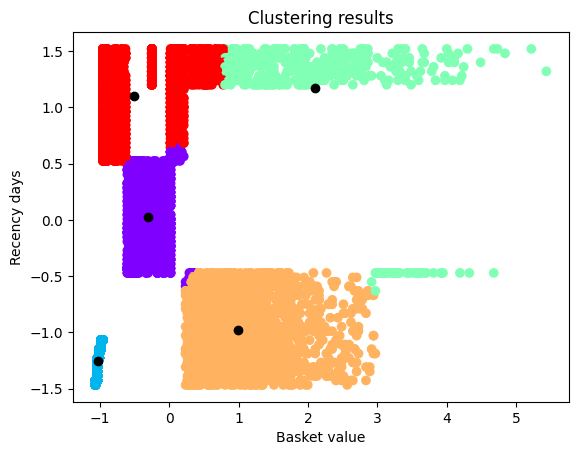

In [107]:
# κανονικοποίηση των δεδομένων
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_d)

# εφαρμογή του αλγορίθμου k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)

# εκτύπωση των κέντρων των κλάσεων
print(kmeans.cluster_centers_)

# παρουσίαση των αποτελεσμάτων σε γράφημα
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.title('Clustering results')
plt.xlabel('Basket value')
plt.ylabel('Recency days')
plt.show()








Στην συνέχεια, παιρνουμε τα δεδομένα και αφου βγάλουμε τους 5 clusters , κάνουμε τους υπολογισμους των μέσων τιμών και των τυπικών αποκλίσεων των κέντρων των ομάδων
<br>
Στον παρακάτω κωδικα:
<br>
Επιλέγουμε τον αριθμό των ομάδων που θέλουμε να δημιουργήσουμε και δημιουργούμε ένα αντικείμενο KMeans με αυτόν τον αριθμό ως παράμετρο.

Περνάμε τα δεδομένα μας στον clusterer χρησιμοποιώντας τη μέθοδο fit().

Χρησιμοποιούμε τη μέθοδο predict() για να αντιστοιχίσουμε κάθε παρατήρηση στην ομάδα που ανήκει.
<br>
Στη συνέχεια, μπορούμε να ερμηνεύσουμε κάθε ομάδα μέσω των μέσων τιμών και των τυπικών αποκλίσεων των κέντρων των ομάδων, σε συνδυασμό με την κατανομή των συναλλαγών που ανήκουν σε κάθε ομάδα. Για παράδειγμα, μπορούμε να έχουμε την εξής ερμηνεία των ομάδων:
<br>
 Η Ομάδα 1 και 2 αντιπροσωπεύουν συναλλαγές που έχουν γίνει πρόσφατα, με διαφορετικές αξίες, ενώ η Ομάδα 3 και 4 αντιπροσωπεύουν συναλλαγές με διαφορετικές αξίες που έχουν γίνει παλαιότερα, και η Ομάδα 5 αντιπροσωπεύει συναλλαγές υψηλής αξίας που έχουν γίνει παλαιότερα.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


centers: [[ 7.64664537 22.63019169]
 [ 5.53203883 70.78586839]
 [ 4.9296746   6.93200583]
 [ 3.87905074 38.80851064]
 [ 2.81575283 55.44038294]] 
 mean values: [ 4.96063247 38.9193919 ] 
 std values: [ 1.63171423 22.70224075]
Cluster 1: Mean - [ 7.64664537 22.63019169], Standard Deviation - [3.57355854 4.61910737]
Cluster 2: Mean - [ 5.53203883 70.78586839], Standard Deviation - [4.29557215 3.40505286]
Cluster 3: Mean - [4.9296746  6.93200583], Standard Deviation - [4.0410139  3.54771036]
Cluster 4: Mean - [ 3.87905074 38.80851064], Standard Deviation - [0.7485959  4.80718157]
Cluster 5: Mean - [ 2.81575283 55.44038294], Standard Deviation - [1.27697862 4.54310812]


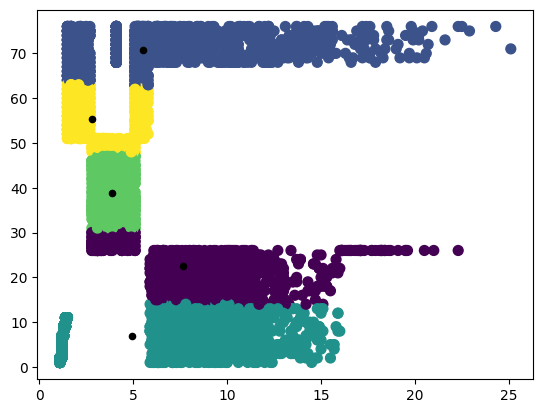

In [108]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X = new_d.values
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=1);

#τυπ αποκλ & μεση τιμη
centers = kmeans.cluster_centers_
mean_values = centers.mean(axis=0)
std_values = centers.std(axis=0)
print(f'centers: {centers} \n mean values: {mean_values} \n std values: {std_values}')
for i in range(len(centers)):
    print("Cluster {}: Mean - {}, Standard Deviation - {}".format(i+1, centers[i], X[y_kmeans == i].std(axis=0)))

Για το 3ο ερωτημα της ασκησης 3, δημιουργουμε ένα dataframe που περιεέχει τις στηλες basket_value & recency_days και ως έξτρα έχουμε μια στηλη για καθε cluster οπου εχει 0/1 αναλογα με το αν η συναλλαγη ανηκει σε αυτον η οχι.

In [113]:
# Ανάθεση συναλλαγών σε cluster
y_kmeans = kmeans.predict(X)
# Δημιουργία νέου χαρακτηριστικού
cluster_cols = pd.get_dummies(y_kmeans, prefix='Cluster')
# Συνένωση των δύο πίνακων
new_d = pd.concat([new_d, cluster_cols], axis=1)
# Εμφάνιση των πρώτων 10 συναλλαγών με τα νέα χαρακτηριστικά
print(new_d.head(10))



   basket_value  recency_days  Cluster_0  Cluster_1  Cluster_2  Cluster_3  \
0           1.1             2          0          0          1          0   
1           3.6            31          0          0          0          1   
2           1.2             7          0          0          1          0   
3           6.6             7          0          0          1          0   
4           2.5            66          0          1          0          0   
5           2.7            61          0          0          0          0   
6           2.2            67          0          1          0          0   
7           3.5            47          0          0          0          1   
8           1.2             7          0          0          1          0   
9           7.9            17          1          0          0          0   

   Cluster_4  Cluster_0  Cluster_1  Cluster_2  ...  Cluster_0  Cluster_1  \
0          0          0          0          1  ...          0          0   


Τέλος, μπορουμε να δουμε κάποιες οπτικοποιησεις αν χρησιμοποιησουμε την silhouette παραμετρο.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6504391146190663


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6024260332152725


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5624452753257465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5285368056295537


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5072456501599084


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.48987085400619684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.47083892957122164


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.46221008257983953


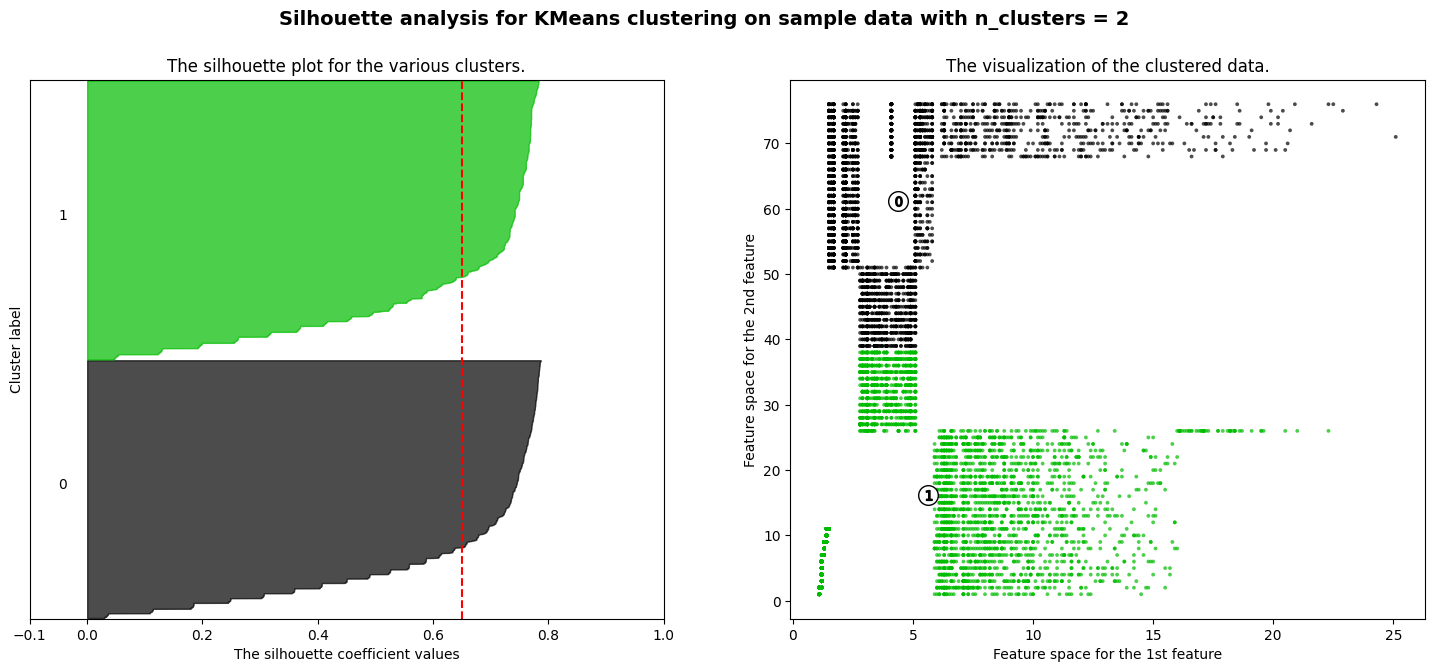

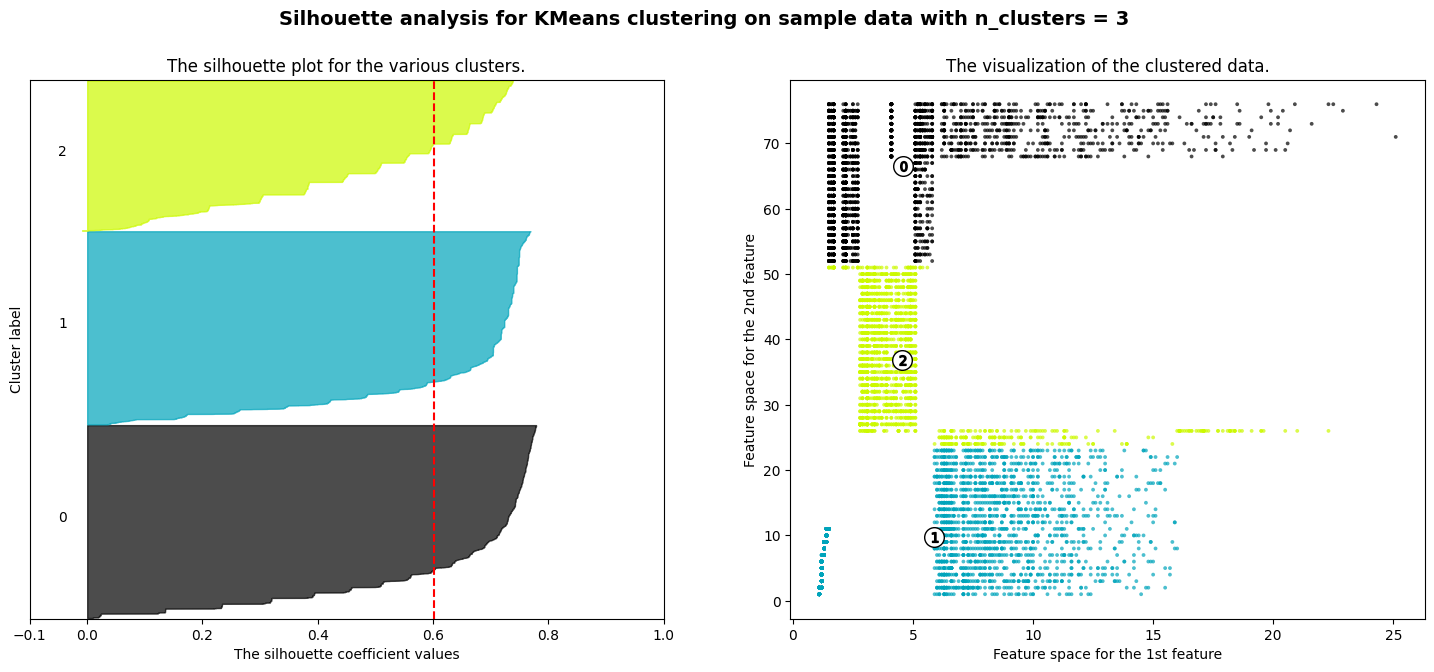

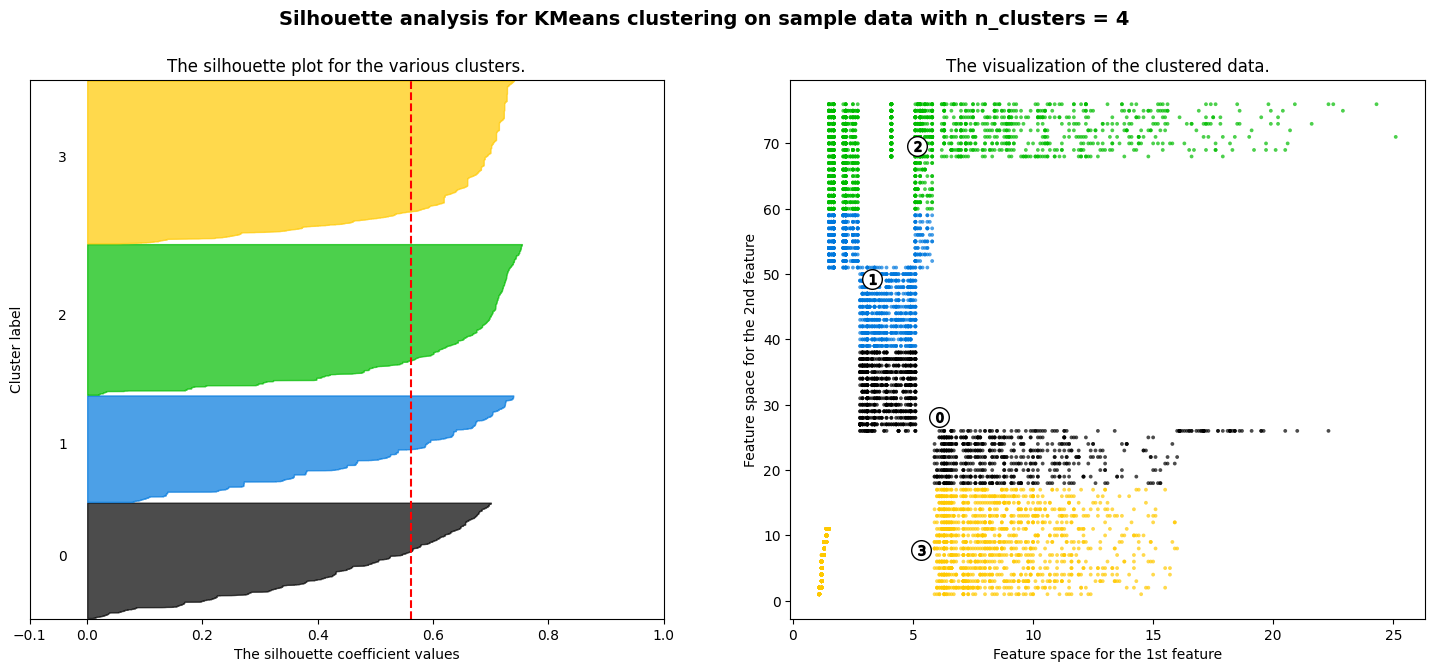

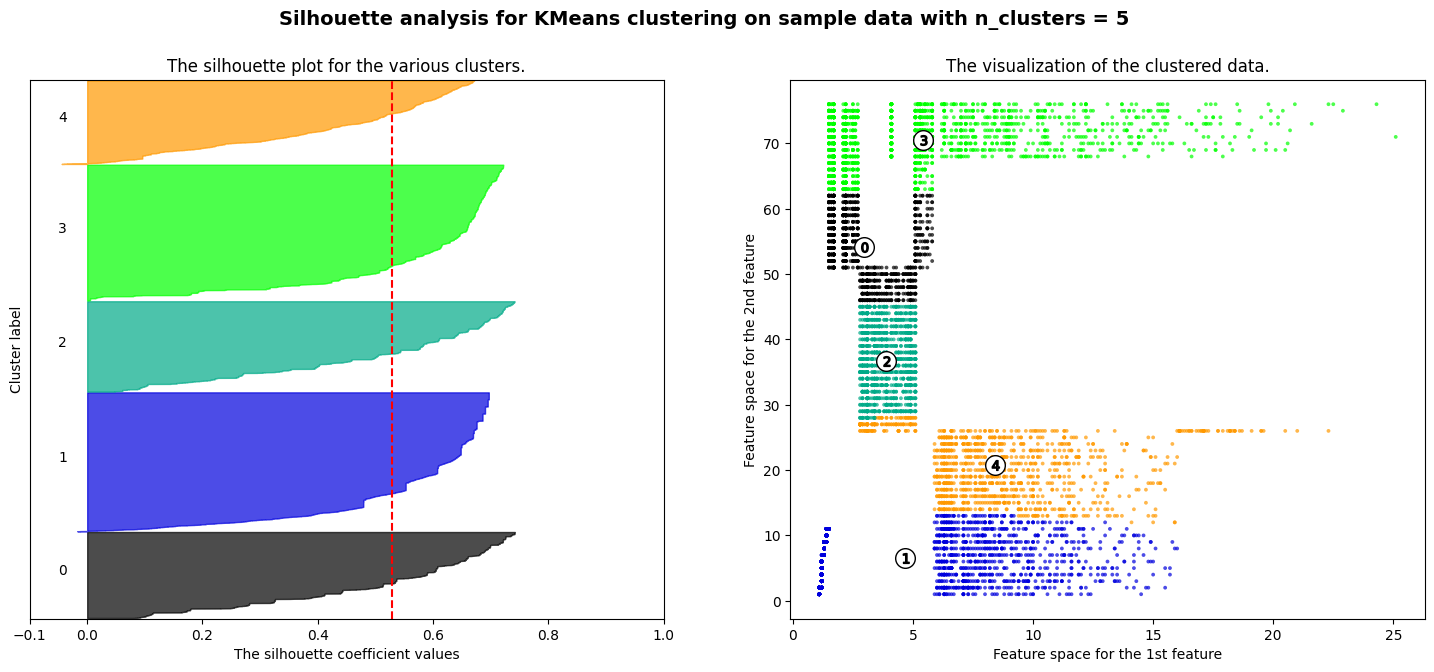

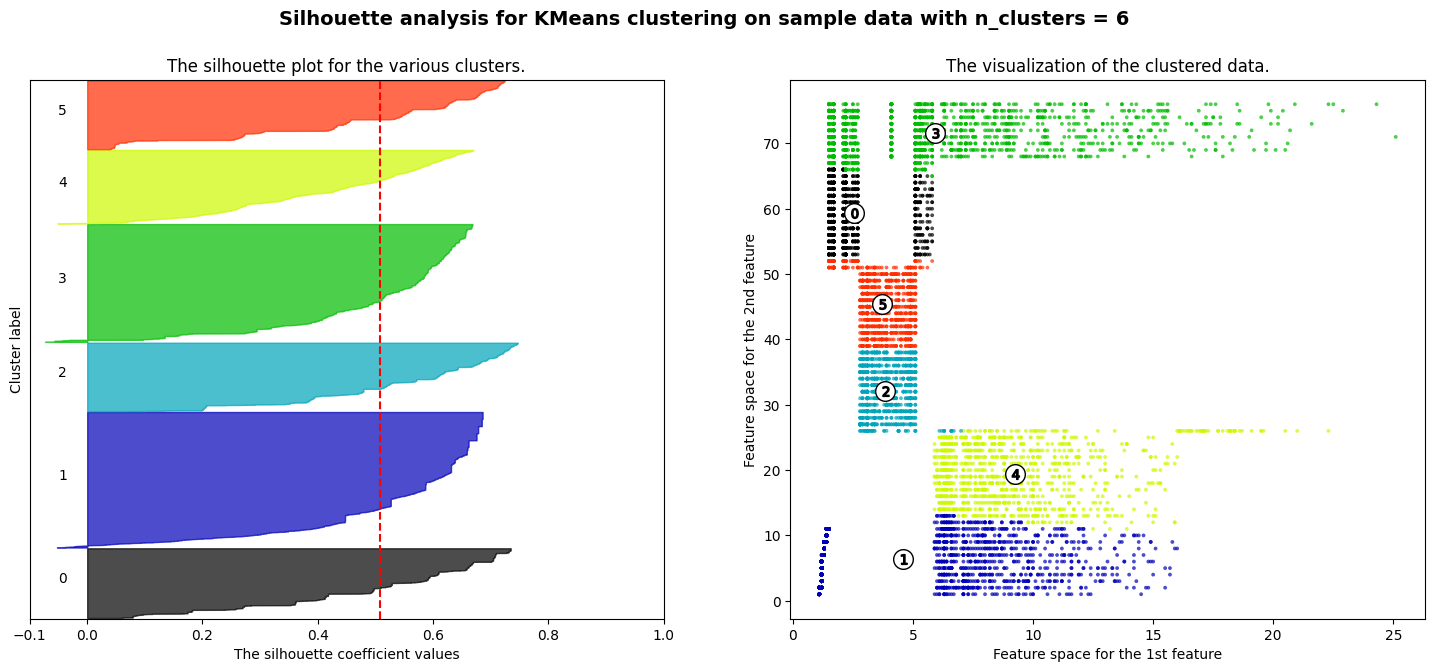

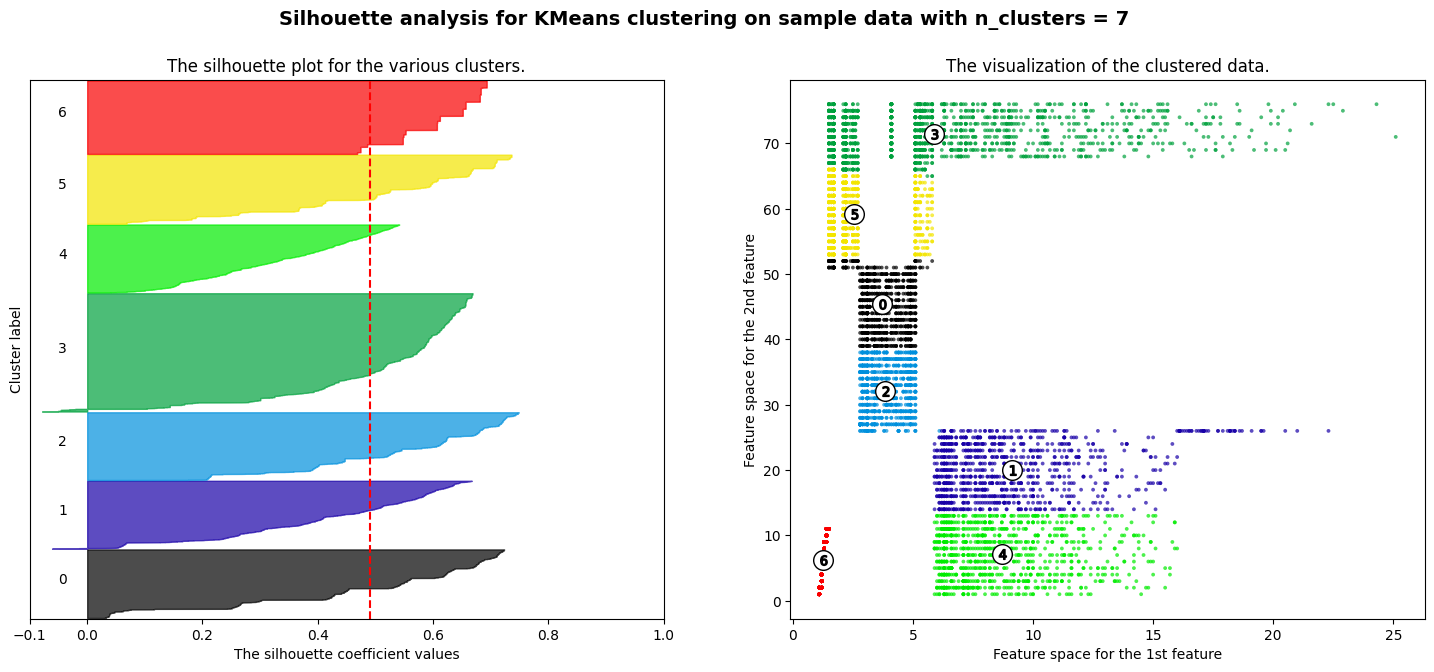

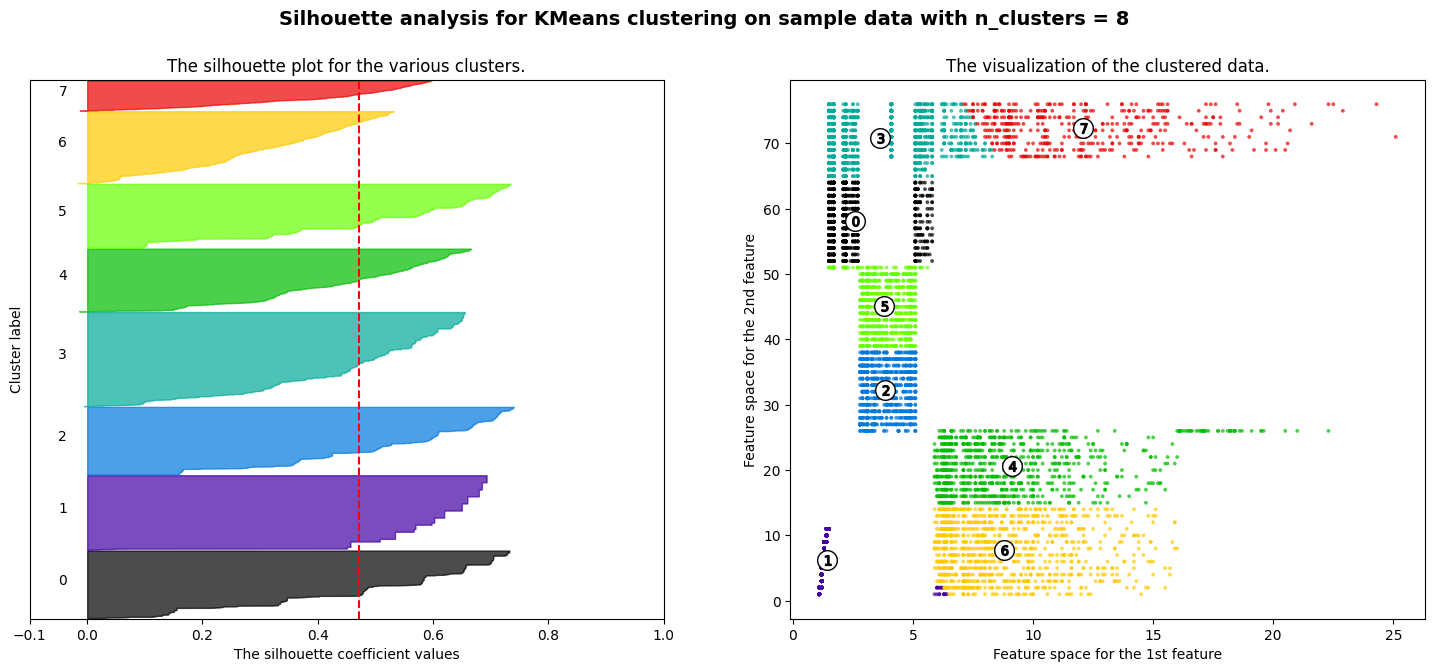

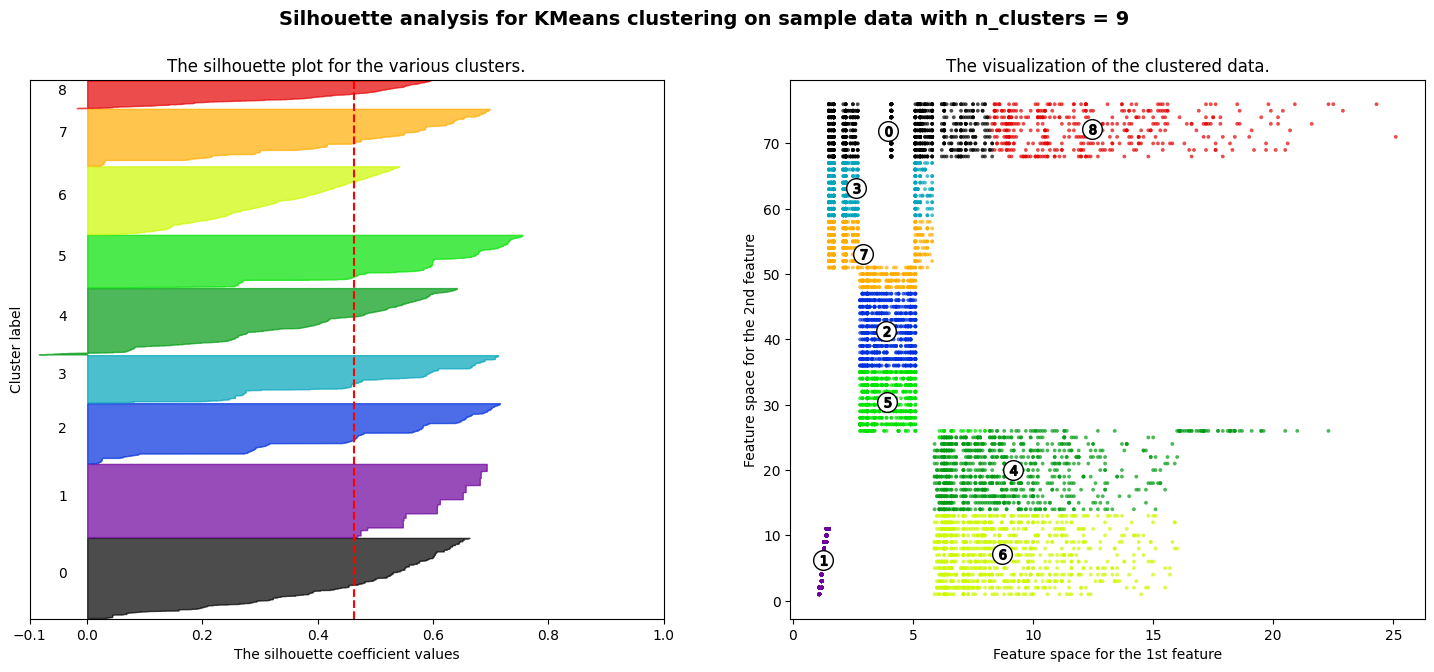

In [110]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,10):
      # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()